In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.21.4
3.4.3
0.5.2


tokenize 함수정의

In [2]:
def tokenize(corpus):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

  return tensor, tokenizer

데이터 확인

In [3]:
import pandas as pd

train_df = pd.read_csv("ratings_train.txt", sep="\t")
test_df = pd.read_csv("ratings_test.txt", sep="\t")

print(train_df.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


중복데이터 확인

In [5]:
train_df[train_df.duplicated()]

,id,document,label


결측치 제거

In [6]:
train_df = train_df.dropna(subset=['document']).reset_index(drop=True)
test_df = test_df.dropna(subset=['document']).reset_index(drop=True)

데이터 전처리 함수 정의

In [7]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9?.!,♡♥^;]+", " ", text)
    text = text.strip()
    return text

train_df["document"] = train_df["document"].astype(str).apply(clean_text)
test_df["document"] = test_df["document"].astype(str).apply(clean_text)

In [8]:
train_df["document"].head()

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [9]:
test_df["document"].head()

0                                                  굳 ㅋ
1                                 gdntopclassintheclub
2               뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                     지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4    3d만 아니었어도 별 다섯 개 줬을텐데.. 왜 3d로 나와서 제 심기를 불편하게 하죠??
Name: document, dtype: object

문장의 최단 길이: 0
문장의 최장 길이: 140
문장의 평균 길이: 35


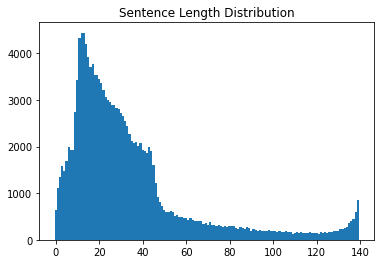

In [10]:
import matplotlib.pyplot as plt
min_len = 999
max_len = 0
sum_len = 0

for sen in train_df["document"]:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_df["document"]))

sentence_length = np.zeros((max_len), dtype=int)

for sen in train_df["document"]:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [11]:
def check_sentence_with_length(raw, length):
    count = 0

    for sen in train_df["document"]:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(train_df["document"], 1)

아
잼
즐
1
4
4
굿
짱
휴
.
1
굿
음
?
?
ㅎ
굿
ㅋ
굿
즐
♥
^
굳
ㅋ
네
ㅎ
ㅋ
굿
ㅇ
k
.
굿
굿
굳
ㅠ
?
짱
1
ㅋ
굿
우
쒯
?
굿
굿
굳
굿
토
ㅋ
ㅋ
굿
ㅋ
굿
o
똥
ㅎ
.
굿
ㅎ
짱
굳
굿
굿
짱
?
z
굿
?
짱
음
굳
ㅇ
헐
굳
굳
굿
굿
굿
삼
꽝
굿
굿
굿
굿
ㅎ
굳
굿
4
!
?
ㅎ
1
굳
.
ㅎ
풉
아
굿
똥
ㅅ
왜


문자열 자르기

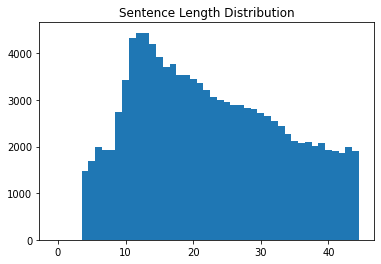

In [18]:
max_len = 45
min_len = 5

train_df = train_df[train_df["document"].str.len() <= max_len].reset_index(drop=True)
train_df = train_df[train_df["document"].str.len() >= min_len].reset_index(drop=True)

sentence_length = np.zeros((max_len),dtype=int)
filtered_corpus = train_df["document"].tolist()
for sen in filtered_corpus:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [16]:
length = train_df["document"].str.len()

print(length.describe())

count    113996.000000
mean         23.567327
std          10.756280
min           5.000000
25%          15.000000
50%          22.000000
75%          32.000000
max          45.000000
Name: document, dtype: float64


In [19]:
filtered_corpus[:10]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다']

In [20]:
# 문장 길이 기준으로 필터링된 DataFrame 생성
filtered_df = train_df[
    train_df["document"].apply(lambda x: min_len <= len(x) < max_len)
].copy()


In [21]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112093 entries, 0 to 113995
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        112093 non-null  int64 
 1   document  112093 non-null  object
 2   label     112093 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


## SentencePiece 기반

In [28]:
import sentencepiece as spm
import os

model_path = "korean-english-park.train.ko"

vocab_size = 8000
model_prefix = "korean_spm"

with open(model_path, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    input = model_path,
    model_prefix = model_prefix,
    vocab_size = vocab_size,
    model_type = 'unigram',
    character_coverage=1.0, 
    pad_id=0, unk_id=1,          # special token id를 명시적으로 설정
    bos_id=2, eos_id=3
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: korean-english-park.train.ko
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 1
  bos_id: 2
  eos_id: 3
  pad_id: 0
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 

-rw-r--r-- 1 root root 371185 May  9 19:57 korean_spm.model
-rw-r--r-- 1 root root 140671 May  9 19:57 korean_spm.vocab


SentencePiece Vocab 생성

In [29]:
def sp_tokenize(s, corpus):

  tensor = []

  for sen in corpus:
    tensor.append(s.EncodeAsIds(sen))

  with open("./korean_spm.vocab", "r") as f:
    vocab = f.readlines()

  word_index = {}
  index_word = {}

  for idx, line in enumerate(vocab):
    word = line.split("\t")[0]

    word_index.update({word:idx})
    index_word.update({idx:word})

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

  return tensor, word_index, index_word

In [32]:
sp_token = spm.SentencePieceProcessor()
sp_token.Load(model_prefix + '.model')

tensor, word_index, index_word = sp_tokenize(sp_token, filtered_corpus)

label 데이터 정의

In [37]:
spm_labels = train_df["label"].astype(int)

test_df 토큰화

In [64]:
test_corpus = test_df["document"].tolist()
test_tensor,_,_ = sp_tokenize(sp_token,test_corpus)
test_labels = test_df["label"].astype(int)

LSTM 모델정의

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

def lstm_model(vocab_size, embedding_dim=128, lstm_units=128):
    model_lstm = tf.keras.Sequential()
    model_lstm.add(Embedding(vocab_size, embedding_dim,input_length=max_len))
    model_lstm.add(LSTM(lstm_units))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(1,activation="sigmoid"))
    
    model_lstm.summary()
    
    return model_lstm

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(tensor, spm_labels, test_size=0.1, random_state=42)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

save_dir = './ckpoints'  # 원하는 경로로 지정 가능
os.makedirs(save_dir, exist_ok=True)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath=os.path.join(save_dir, "vacab8000_spm_post.h5"),
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [55]:
spm_model = lstm_model(vocab_size)

spm_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 45, 128)           1024000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,155,713
Trainable params: 1,155,713
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = spm_model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=10,
    batch_size=128,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
802/802 [==============================] - 48s 6ms/step - loss: 0.4712 - accuracy: 0.7486 - val_loss: 0.3651 - val_accuracy: 0.8353

Epoch 00001: val_loss improved from inf to 0.36509, saving model to ./ckpoints/vacab8000_spm_post.h5
Epoch 2/10
802/802 [==============================] - 5s 6ms/step - loss: 0.3289 - accuracy: 0.8587 - val_loss: 0.3406 - val_accuracy: 0.8518

Epoch 00002: val_loss improved from 0.36509 to 0.34061, saving model to ./ckpoints/vacab8000_spm_post.h5
Epoch 3/10
802/802 [==============================] - 5s 6ms/step - loss: 0.2895 - accuracy: 0.8759 - val_loss: 0.3462 - val_accuracy: 0.8511

Epoch 00003: val_loss did not improve from 0.34061
Epoch 4/10
802/802 [==============================] - 5s 6ms/step - loss: 0.2596 - accuracy: 0.8903 - val_loss: 0.3679 - val_accuracy: 0.8507
Restoring model weights from the end of the best epoch.

Epoch 00004: val_loss did not improve from 0.34061
Epoch 00004: early stopping


In [57]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

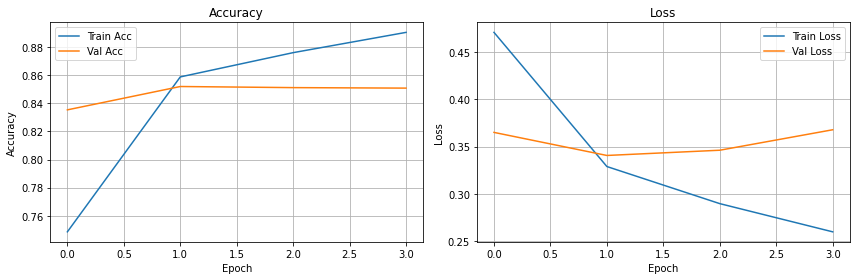

In [58]:
plot_history(history)

In [65]:
loss, acc = spm_model.evaluate(test_tensor, test_labels)
print(f"Test Accuracy: {acc:.4f}")

1563/1563 [==============================] - 6s 4ms/step - loss: 0.5598 - accuracy: 0.8497
Test Accuracy: 0.8497


## KoNLPy기반 모델 - mecab

mecab install

mecab - 모델학습

In [86]:
from konlpy.tag import Mecab
mecab = Mecab()

In [87]:
def mecab_split(sentence):
  return mecab.morphs(sentence)
mecab_corpus = []

for kor in filtered_corpus:
  mecab_corpus.append(mecab_split(kor))

In [88]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 37345


같은 LSTM모델 사용

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
embedding_dim = 128
model = Sequential(
    [
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
        LSTM(units=64),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 45, 128)           1024000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,073,473
Trainable params: 1,073,473
Non-trainable params: 0
_________________________________________________________________


In [90]:
history_mecab = model.fit(
    mecab_tensor, y,
    epochs=5,
    batch_size=128,
)

Epoch 1/5
898/898 [==============================] - 5s 5ms/step - loss: 0.4132 - accuracy: 0.8048
Epoch 2/5
898/898 [==============================] - 4s 5ms/step - loss: 0.3265 - accuracy: 0.8583
Epoch 3/5
898/898 [==============================] - 4s 5ms/step - loss: 0.2895 - accuracy: 0.8755
Epoch 4/5
898/898 [==============================] - 4s 5ms/step - loss: 0.2613 - accuracy: 0.8902
Epoch 5/5
898/898 [==============================] - 4s 5ms/step - loss: 0.2368 - accuracy: 0.9023


In [98]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report

# 1) 테스트 데이터 전처리
import pandas as pd, re
test_df = pd.read_csv("ratings_test.txt", sep="\t").dropna(subset=["document"])
X_test_raw = test_df["document"].tolist()
y_test     = test_df["label"].values

def clean_text(text):
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(text))
    return text.strip()

X_test_cleaned = [clean_text(sent) for sent in X_test_raw]

# 2) MeCab 토크나이즈
X_test_tokens = [mecab.morphs(sent) for sent in X_test_cleaned]

# 3) 정수 인코딩 (훈련 때 생성된 mecab_tokenizer 사용)
X_test_seq = mecab_tokenizer.texts_to_sequences(X_test_tokens)

# 4) 패딩 (훈련 때 tensor.shape[1] 또는 미리 정의한 max_len 사용)
max_len = mecab_tensor.shape[1]   # 또는 직접 숫자로 지정
X_test_pad = pad_sequences(X_test_seq, padding="post", maxlen=max_len)

# 5) 예측 & 평가
y_pred_probs = model.predict(X_test_pad)
y_pred       = (y_pred_probs > 0.5).astype(int).flatten()

acc = accuracy_score(y_test, y_pred)
print(f"MeCab 모델 Test Accuracy: {acc:.4f}\n")
print(classification_report(y_test, y_pred, target_names=["부정","긍정"]))


MeCab 모델 Test Accuracy: 0.8429

              precision    recall  f1-score   support

          부정       0.83      0.86      0.84     24826
          긍정       0.85      0.83      0.84     25171

    accuracy                           0.84     49997
   macro avg       0.84      0.84      0.84     49997
weighted avg       0.84      0.84      0.84     49997

